<h1><center>PHYS-F-302</center></h1>
<h1><center>Partie numérique</center></h1>
<h2><center>Cédric SCHOONEN, Maxime JAMOTTE</center></h2>

Dans ce notebook, nous résolverons le problème donné à l'adresse https://github.com/bknaepen/MATHF314_2017/ dans le dossier Stokes. Le problème consiste à résoudre l'équation $\Delta^2\psi=0$ par la méthode du "gradient conjugé".

## Justification physique des conditions aux bords

Commençons par donner une justification physique au choix des conditions aux bords utilisé dans l'énoncé.

Traitons d'abord les conditions placées sur les dérivées de la stream function $\psi$. Celles-ci sont listées ci-dessous:

| $\partial_x \psi = 0$ | $\partial_y \psi = 1$ | $\partial_x \psi = 0$ | $\partial_y \psi = 0$ |
|-----------------------|-----------------------|-----------------------|-----------------------|
| bord immobile // y    | bord mobile // x      | bord immobile // y    | bord immobile // x    |

Notre argument pour justifier ces conditions est que le fluide ne "glisse" pas sur les parois de la cavité, i.e. La composante tangentielle à la paroi de la vitesse relative entre le fluide et le bord en question est nulle près du bord. Cet argument s'appuie sur l'existence de forces intermoléculaires entre les molécules de fluide et de la paroi, d'aspérités sur la paroi ainsi que sur la nature fluidique du fluide concerné. La logique est qu'à la fois les forces intermoléculaires et les aspérités du bord vont avoir tendance à retenir les molécules de fluide proches de la paroi immobiles par rapport à cette dernière. La fluidité du fluide va rendre cette immobilisation possible car les molécules de fluide plus éloignées de la paroi vont simplement "rouler" sur les molécules plus proches sans les emporter totalement avec elles. En pratique, cela implique que la vitesse tangentielle du fluide au plus proche des bords est la même que la vitesse de la paroi. Par example, la vitesse tangentielle près du bord mobile de vitesse $1$ sera $u=1$. Sachant que $ u = \partial_y\psi$ et $v = -\partial_x\psi$, nous avons bien dans notre cas $\partial_y\psi = u = 1$.

La condition sur $\psi$, fixée à $0$ sur tout le périmètre de la cavité, se justifie quant à elle par un autre argument. Cet argument repose sur l'imperméabilé de la paroi. En effet, si les molécules ne peuvent traverser les bords, il est nécessaire que leur vitesse normale s'annule au plus près de ces bords. Se rappelant de la relation entre $u,v$ et les dérivées de $\psi$, nous voyons que cela implique que la dérivée de $\psi$ dans la direction tangentielle à un bord est nulle sur ce bord. Par la continuité de $\psi$ dans la cavité, nous avons donc que $\psi$ prend la même valeur sur tout le périmètre de cette cavité. Comme seules les dérivées de $\psi$ ont un sens physique, nous pouvons librement choisir de fixer cette valeur à $0$.

Nous avons donc vérifié que les conditions aux bords qui ont été choisies décrivent bien la situation physique attendue.

## Discrétisation de l'opérateur bilaplacien

Le bilaplacien de $\psi$ à discrétiser s'écrit comme $\Delta^2\psi = \partial_{xxxx}\psi + 2\partial_{xxyy}\psi + \partial_{yyyy}\psi$ en supposant $\psi$ suffisamment régulière.

Nous pouvons exprimer les dérivées d'ordre 2 et 4 dans les directions $x,y$ de la façon suivante:

$$ \partial_{xx}\psi_{i,j} = \frac{ \psi_{i,j+1} -2 \psi_{i,j} + \psi_{i,j-1} }{ (dx)^2 } + \cal O((dx)^2) $$

$$ \partial_{yy}\psi_{i,j} = \frac{ \psi_{i-1,j} -2 \psi_{i,j} + \psi_{i+1,j} }{ (dy)^2 } + \cal O((dy)^2) $$

$$ \partial_{xxxx}\psi_{i,j} = \frac{ \psi_{i,j+2} -4 \psi_{i,j+1} +6 \psi_{i,j} -4\psi_{i,j-1} + \psi_{i,j-2} }{ (dx)^4 } + \cal O((dx)^2) $$

$$ \partial_{yyyy}\psi_{i,j} = \frac{ \psi_{i-2,j} -4 \psi_{i-1,j} +6 \psi_{i,j} -4\psi_{i+1,j} + \psi_{i+2,j} }{ (dy)^4 } + \cal O((dy)^2) $$

Les discrétisations des dérivées secondes sont utiles pour trouver celle de la dérivée croisée $\partial_{xxyy}\psi$:

$$ \partial_{xxyy}\psi_{i,j} = \frac{ \partial_{yy}\psi_{i,j+1} -2 \partial_{yy}\psi_{i,j} + \partial_{yy}\psi_{i,j-1} }{ (dx)^2 } + \cal O((dx)^2) $$

En remplaçant, cela donne

$$ \partial_{xxyy}\psi_{i,j} = \frac{ \frac{\psi_{i-1,j+1} -2 \psi_{i,j+1} + \psi_{i+1,j+1}}{(dy)^2} + \cal O((dy)^2)
                                    -2\frac{\psi_{i-1,j  } -2 \psi_{i,j  } + \psi_{i+1,j  }}{(dy)^2} + \cal O((dy)^2)
                                    + \frac{\psi_{i-1,j-1} -2 \psi_{i,j-1} + \psi_{i+1,j-1}}{(dy)^2} + \cal O((dy)^2)
                                    }{(dx)^2} + \cal O((dx)^2) $$
$$ \partial_{xxyy}\psi_{i,j} = \frac{\psi_{i-1,j+1}  -2 \psi_{i,j+1} +  \psi_{i+1,j+1}
                                     -2 \psi_{i-1,j} +4 \psi_{i-1,j} -2 \psi_{i+1,j}
                                     \psi_{i-1,j-1}  -2 \psi_{i,j-1} +  \psi_{i+1,j-1}
                                     }{(dx)^2(dy)^2} + \cal O((dx)^2) + \cal O((dy)^2) + \cal O\left(\frac{(dx)^4}{(dy)^2}\right) $$       
                                     
Les coefficients sont plus facilement visualisés dans le tableau suivant:

|     || j-1 |  j  | j+1 |
|-----||-----|-----|-----|
| i-1 ||  1  | -2  |  1  |
|  i  || -2  |  4  | -2  |
| i+1 ||  1  | -2  |  1  |

Notons qu'il est laborieux de montrer que les termes en $\cal O((dx)^2)$ du numérateur se simplifient pour donner une erreur en $\cal O\left(\frac{(dx)^4}{(dy)^2}\right)$. De plus, cette preuve nous semble dénuée d'intérêt pour le sujet c'est pourquoi nous ne l'écrirons pas ici. Cependant, l'ayant faite, nous sommes interrogeables sur le sujet.

Les coefficients pour le bilaplacien se résument donc *dans le cas où $dx$ = $dy$* par:

|     || j-2 | j-1 |  j  | j+1 | j+2 |
|-----||-----|-----|-----|-----|-----|
| i-2 ||     |     |  1  |     |     |
| i-1 ||     |  2  | -8  |  2  |     |
|  i  ||  1  | -8  | 20  | -8  |  1  |
| i+1 ||     |  2  | -8  |  2  |     |
| i+2 ||     |     |  1  |     |     |

## Discrétisation des conditions aux bords

Nous avons deux conditions aux bords à discrétiser. La première est $\psi = 0$, que nous implémentons de manière évidente et correcte à tous les ordres comme 

$$\psi_{i,0} = \psi_{i,N-1} = \psi_{0,j} = \psi_{N-1,j} = 0 \quad \forall i,j=0,...,N-1$$

La deuxième condition aux bords est portée sur les dérivées de $\psi$ et prend des expressions différentes suivant le bord en question. La condition sur le bord situé en $x=0$ est $\partial_x\psi = 0$. Nous la discrétisons en considérant une approximation à l'ordre 1 de type forward de la dérivée en $x=0$:

$$ 0 = \partial_x\psi_{i,0} = \frac{-\frac 32\psi_{i,0} + 2\psi_{i,1} -\frac 12\psi_{i,2}}{dx} + \mathcal O((dx)^2) $$
$$ \psi_{i,1} = \frac 34 \psi_{i,0} + \frac 14 \psi_{i,2} + \mathcal O((dx)^3) = \frac 14 \psi_{i,2} + \mathcal O((dx)^3) $$

Il est facile de voir que ce raisonnement se généralise à tous les côtés. Nous détaillons encore le côté supérieur pour lequel la condition est légèrement différente.

$$ 1 = \partial_y\psi_{N-1,j} = \frac{\frac 32\psi_{N-1,j} - 2\psi_{N-2,j} +\frac 12 \psi_{N-3,j}}{dy} + \mathcal O((dy)^2) $$
$$ \psi_{N-2,j} = -\frac 12 dy + \frac 34 \psi_{N-1,j} + \frac 14 \psi_{N-3,j} + \mathcal O((dx)^3) = -\frac 12 dy + \frac 14 \psi_{N-3,j} + \mathcal O((dx)^3) $$

Nos conditions sur les dérivées se résument donc de la façon suivante:

$$ \psi_{i,1} = \frac 14 \psi_{i,2} + \cal O((dx)^3) $$
$$ \psi_{i,N-2}        = \frac 14 \psi_{i,N-3} + \cal O((dx)^3) $$
$$ \psi_{1,j}        =  \frac 14 \psi_{2,j} + \cal O((dy)^3) $$
$$ \qquad \ \  \psi_{N-2,j} = -\frac 12 dy + \frac 14 \psi_{N-3,j} + \mathcal O((dy)^3) $$

Remarquons que l'imposition des conditions aux bords est incohérentes pour les 2 points $(N-2,1)$ et $(N-2,N-2)$ situés près des coins. En effet, ceux-ci se retrouvent deux fois dans les formules ci-dessus et se voient imposées deux valeurs différentes. Ceci amène un choix arbitraire dans notre code concernant la valeur à utiliser. Cependant, ceci n'est pas un problème physique car dans la limite $N\rightarrow \infty$, $dy\rightarrow 0$ et les deux valeurs coïncident. Il nous a donc semblé plus naturel d'imposer directement la valeur la plus proche de  $0$, c'est à dire la condition donnée pour le bord parallèle à l'axe $y$.

## Implémentation de la méthode du gradient conjugé

In [1]:
import time
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import pyplot, cm

Nous importons des fonctions prédéfinies dans le mooc pour la méthode du gradient conjugé.

In [2]:
import Conjugate_Gradient as cg

Nous implémentons maintenant le bilaplacien discrétisé plus haut. Comme les conditions aux bords fixent les valeurs pour les deux rangées de points extérieurs, nous ne calculons le bilaplacien que dans un carré centré de taille $(N-4)\times (N-4)$. Les conditions aux bords sont implémentées dans l'opérateur lui-même, via le champ $p$ à partir duquel il est calculé.

In [3]:
def bilaplacian(p0,dx):   # En réalité bilaplacien modifié par les conditions aux bords
        
    p = p0.copy()
    N = p.shape[0]
    Ap = numpy.zeros((N,N))
    
    p[:,0]  = 0
    p[:,-1] = 0
    p[0,:]  = 0
    p[-1,:] = 0
    
    p[1:-1,1]  = 1/4*p0[1:-1,2]
    p[1:-1,-2] = 1/4*p0[1:-1,-3]
    p[1,2:-2]  = 1/4*p0[2,2:-2]    
    p[-2,2:-2] = -dx/2+1/4*p0[-3,2:-2]
    
    Ap[2:-2,2:-2] = 20*p[2:-2,2:-2]-8*(p[1:-3,2:-2]+p[2:-2,1:-3]+p[2:-2,3:-1]+p[3:-1,2:-2])+\
                    2*(p[1:-3,1:-3]+p[1:-3,3:-1]+p[3:-1,1:-3]+p[3:-1,3:-1])+\
                    1*(p[:-4,2:-2]+p[2:-2,:-4]+p[2:-2,4:]+p[4:,2:-2])
    
    return Ap/dx**4

In [4]:
def impose_bc(p0,dy):
    
    p = p0.copy()
    
    p[:,0]  = 0
    p[:,-1] = 0
    p[0,:]  = 0
    p[-1,:] = 0
    
    p[1:-1,1]  =       0 + 1/4*p0[1:-1,2]
    p[1:-1,-2] =       0 + 1/4*p0[1:-1,-3]
    p[1,2:-2]  =       0 + 1/4*p0[2,2:-2]    
    p[-2,2:-2] = -1/2*dy + 1/4*p0[-3,2:-2]  
    
    return p

Nous récupérons et adaptons le code du mooc à notre problème.

In [5]:
def conjugate_gradient_2d(p, b, dx, l1_target):
    '''Performs cg relaxation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing (same in both directions)
    l1_target: float
        exit criterion
        
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    N = p.shape[0]
    r  = numpy.zeros((N,N)) # residual
    Ad  = numpy.zeros((N,N)) # to store result of matrix multiplication 
    
    l1_norm = 1
    iterations = 0
    l1_conv = []
    
    # Step-0 We compute the initial residual and 
    # the first search direction is just this residual
    
    r = (b-bilaplacian(p,dx))*dx**4
    d = r.copy()
    rho = numpy.sum(r*r)
    Ad = bilaplacian(d,dx)*dx**4
    sigma = numpy.sum(d*Ad)
    
    # Iterations
    while l1_norm > l1_target:

        pk = p.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma

        p = pk + alpha*dk
        r = rk - alpha*Ad
        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
        rho = rhop1
        
        d = r + beta*dk
        Ad = bilaplacian(d,dx)*dx**4
        sigma = numpy.sum(d*Ad)
    
        l1_norm = cg.L1norm(pk,p)
        iterations += 1
        l1_conv.append(l1_norm)
    
    print('Number of CG iterations: {0:d}'.format(iterations))
    return p, l1_conv   

## Calcul de la stream function qui respecte $\Delta^2\psi=0$

Nous utilisons les paramètres (taille de grille, dimensions spatiales, précision désirée) imposées dans l'énoncé. 

In [6]:
# paramètres
N = 21
L = 1
l1_target = 1e-3

dx = L/(N-1)

# initialisation -> on peut choisir ce qu'on veut
p0 = numpy.ones((N,N))

# résolution par gradient conjugué sur le centre (N-4)x(N-4) et écrit les valeurs au bord encore sur la réponse finale
p, l1_conv = conjugate_gradient_2d(p0.copy(), 0, dx, l1_target)
p = impose_bc(p,dx)

Number of CG iterations: 40505


<font color="red"> La méthode ne converge pas en moins de $nx\times ny = 41\times 41 = 1681$ itérations. Elle est très lente et le nombre d'itérations grandit rapidement avec l'inverse de la précision demandée. La méthode du gradient congugé ne semble pas fonctionner pour cet opérateur, probablement car celui-ci n'est pas symétrique. </font> <s> Nous remarquons que comme énoncé dans la théorie du mooc, la méthode a bien convergé en moins de $N=nx\times ny = 41\times 41 = 1681$ itérations.</s> La matrice semble prendre les valeurs attendues près des bords, comme nous pouvons le constater ci-dessous.

In [7]:
print(p[-5:,:5])
print(p[-5:,-5:])

[[ 0.         -0.26585978 -1.06343914 -1.91104527 -2.64266333]
 [ 0.         -0.33031361 -1.32125442 -2.14390846 -2.75431384]
 [ 0.         -0.39935128 -1.59740514 -2.19123543 -2.55428613]
 [ 0.          0.25       -0.42435128 -0.57280886 -0.66357153]
 [ 0.          0.          0.          0.          0.        ]]
[[-2.64266668 -1.91104729 -1.06344498 -0.26586124  0.        ]
 [-2.75431647 -2.14390028 -1.32125128 -0.33031282  0.        ]
 [-2.55429579 -2.19122818 -1.59741484 -0.39935371  0.        ]
 [-0.66357395 -0.57280704 -0.42435371  0.25        0.        ]
 [ 0.          0.          0.          0.          0.        ]]


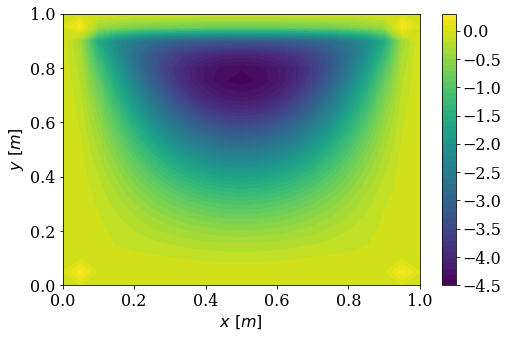

In [8]:
x = numpy.linspace(0,L,N)
y = numpy.linspace(0,L,N)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,p,50,cmap=cm.viridis)
pyplot.xlabel('$x\ [m]$')
pyplot.ylabel('$y\ [m]$')
pyplot.colorbar();

[  0.           0.          45.41356949 -48.7615468  -13.05629404
  -4.41782251  28.12648249   2.5937716  -10.14714286  46.0293648
 -25.93957943  46.35483875 -10.25768784   2.30617391  28.33391386
  -4.20269765 -13.33616123 -48.87434273  45.75450171   0.           0.        ]


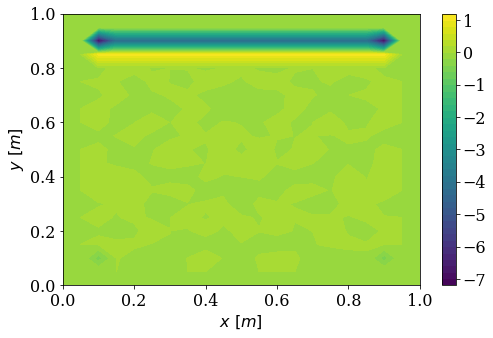

In [9]:
Ap = bilaplacian(p,dx)
print(Ap[10,:])

x = numpy.linspace(0,L,N)
y = numpy.linspace(0,L,N)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,Ap*dx**4,50,cmap=cm.viridis)
pyplot.xlabel('$x\ [m]$')
pyplot.ylabel('$y\ [m]$')
pyplot.colorbar();

<font color="red"> Curieux </font>

## Valeurs de la stream function aux positions demandées

Nous commençons par définir une fonction nous permettant d'extraire la valeur de la stream function à partir des coordonnées cartésiennes. Nous extrayons ensuite les valeurs demandées.

In [10]:
def p_at_coordinates(p,x,y):
    
    N = p.shape[0]
    i = int(y*(N-1))
    j = int(x*(N-1))
    #print("coordinates i={:d} j={:d}".format(i,j))
    
    return p[i,j]

In [11]:
pij = p_at_coordinates(p,0.6,0.2)
print("La valeur en x=0.6 et y=0.2 est:",pij)

pij = p_at_coordinates(p,0.6,0.4)
print("La valeur en x=0.6 et y=0.4 est:",pij)

pij = p_at_coordinates(p,0.6,0.6)
print("La valeur en x=0.6 et y=0.6 est:",pij)

pij = p_at_coordinates(p,0.6,0.8)
print("La valeur en x=0.6 et y=0.8 est:",pij)

La valeur en x=0.6 et y=0.2 est: -0.451616299634
La valeur en x=0.6 et y=0.4 est: -1.61166384689
La valeur en x=0.6 et y=0.6 est: -3.29026270172
La valeur en x=0.6 et y=0.8 est: -4.22146858971


In [12]:
min_p = numpy.min(p)
print(min_p)
max_p = numpy.max(p)
print(max_p)

-4.44615914264
0.25


<font color="red"> Loin des -0.1 cible (cf.année passée) </font>

## Champ de vitesse du fluide

Pour mieux visualiser les mouvements de fluides apparaissant dans notre système, nous affichons le champ de vitesse à l'intérieur de la cavité.

In [13]:
x = numpy.linspace(0,1,N-2)
y = numpy.linspace(0,1,N-2)
dy = dx
vx = numpy.zeros((N-2,N-2))
vy = numpy.zeros((N-2,N-2))

vx =  1/2*(p[2:,1:-1] - p[0:-2,1:-1])/dy
vy = -1/2*(p[1:-1,2:] - p[1:-1,0:-2])/dx

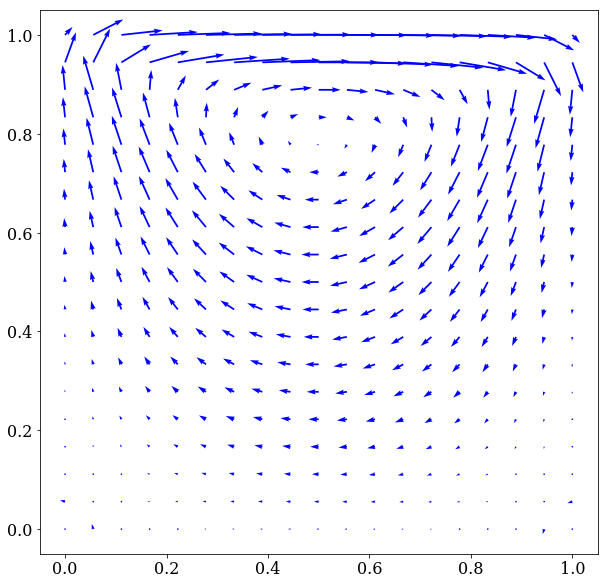

In [14]:
pyplot.figure(figsize=(10,10))
pyplot.quiver(x,y,vx,vy,color='b');

## Ordre de convergence

Nous tenons à vérifier l'ordre de convergence de la méthode implémentée, qui devrait être du second ordre.

In [15]:
nx_values = [11,21,31,41,51]
l1_target = 1e-2
L = 1

dx = numpy.zeros(len(nx_values))
for i in range(len(dx)):
    dx[i] = L/(nx_values[i]-1)

In [16]:
error = numpy.empty(len(nx_values)-1)
p_centre = numpy.empty(len(nx_values))

for i, nx in enumerate(nx_values):
    
    p0 = numpy.zeros((nx,nx))
    p, l1_conv = conjugate_gradient_2d(p0, 0, dx[i], l1_target)
    p = impose_bc(p,dx[i])
    p_centre[i] = p[int(nx/2),int(nx/2)]

for i, nx in enumerate(nx_values[:-1]):
    error[i] = numpy.abs(p_centre[i]-p_centre[-1])

Number of CG iterations: 100
Number of CG iterations: 4578
Number of CG iterations: 22304
Number of CG iterations: 102886
Number of CG iterations: 286978


In [17]:
print(error)

[ 18.95167713  17.48847748  14.66515619   8.99416066]


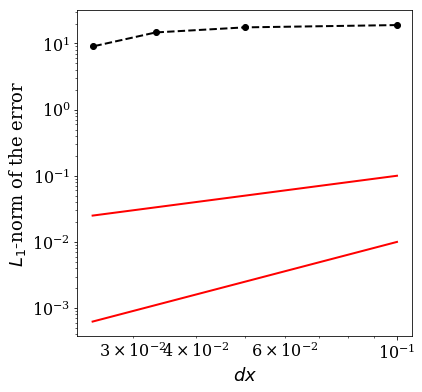

In [18]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$dx$', fontsize=18)
pyplot.ylabel(r'$L_1$-norm of the error', fontsize=18)

pyplot.loglog(dx[:-1], error, color='k', ls='--', lw=2, marker='o');
pyplot.loglog(dx[:-1], dx[:-1]**2, color='r', ls='-', lw=2);
pyplot.loglog(dx[:-1], dx[:-1], color='r', ls='-', lw=2);
pyplot.grid()

In [19]:
alphas = numpy.empty(len(dx)-2)

for i in range(len(alphas)):
    
    alphas[i] = (numpy.log(error[i+1])-numpy.log(error[i]))\
        /(numpy.log(dx[i+1])-numpy.log(dx[i]))
    
print(alphas)

[ 0.11592083  0.43423683  1.69944132]


<font color="red"> La méthode est trop lente pour être correctement testée. </font>  <s> Nous remarquons que l'ordre de convergence de la méthode tourne autour de 1.5. Cette valeur est assez éloignée de l'ordre attendu qui vaut 2. N'ayant pas repéré d'erreur dans notre implémentation, nous ne comprenons pas pourquoi un tel écart existe entre l'ordre réel et l'ordre que la méthode est censée suivre. </s>

## Conclusions

<font color="red">  ** TODO **  </font>